In [19]:
import tensorflow as tf

# Get the list of available GPU devices
gpus = tf.config.list_physical_devices('GPU')

if gpus:
    # Assuming you want to use the first available GPU
    device_name = gpus[0].name
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError("No GPU devices found")

Found GPU at: /physical_device:GPU:0


In [20]:
print(tf.__version__)


2.15.0


In [21]:
##import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [22]:
#Read data / Load data
dataset = pd.read_csv("Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [23]:
#dataset divided into dependent and independent features
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]
X.head()
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [24]:
X.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [25]:
#feature Engineeering
geography = pd.get_dummies(X["Geography"],drop_first=True)
gender = pd.get_dummies(X["Gender"],drop_first=True)

In [26]:
X=X.drop(['Geography','Gender'],axis=1)

In [30]:
X=pd.concat([X,geography,gender],axis=1)

In [31]:
#Splitting dataset into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
#

In [33]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [34]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [35]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [36]:
# ANN creation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

# Initialize ANN
classifier = Sequential()

In [37]:
#Add Input Layer
classifier.add(Dense(units=11,activation='relu'))

In [38]:
#Add Hidden Layer
classifier.add(Dense(units=7,activation='relu'))

In [39]:
#Add another Hidden Layer
classifier.add(Dense(units=6,activation='relu'))

In [40]:
#Output Layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [41]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [51]:
#Early stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [52]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.3060 - accuracy: 0.8709 - val_loss: 0.3794 - val_accuracy: 0.8512
Epoch 2/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3038 - accuracy: 0.8683 - val_loss: 0.3820 - val_accuracy: 0.8485
Epoch 3/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3063 - accuracy: 0.8699 - val_loss: 0.3809 - val_accuracy: 0.8531
Epoch 4/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3051 - accuracy: 0.8711 - val_loss: 0.3823 - val_accuracy: 0.8501
Epoch 5/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3047 - accuracy: 0.8707 - val_loss: 0.3817 - val_accuracy: 0.8470
Epoch 6/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3050 - accuracy: 0.8705 - val_loss: 0.3799 - val_accuracy: 0.8516
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3061 - accuracy: 0.8701 - val_loss: 0.3805 - val_accuracy:

In [53]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

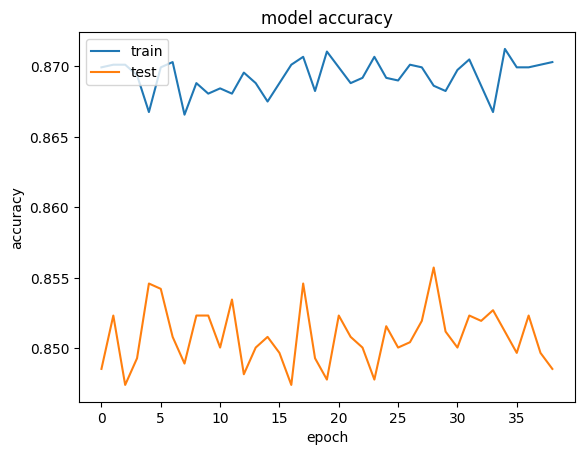

In [50]:
#summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()